# Data Analysis Framework for Photographic Collection Data from the KHI

Information about the project
- Framework
- Development Context
- KHI

# Table of contents

<ul>
    <li><a href='#start'>Getting Started: How to Use This Notebook</a></li>
    <li><a href='#jnglossary'>Notebook Glossary</a></li>
    <li><a href='#khiglossary'>KHI Dataset Glossary</a></li>
    <li><a href='#preparation'>Setting Up the Environment</a></li>
    <li><a href='#upload'>Uploading and Preparing Data</a></li>
    <li><a href='#refining'>Refining the Dataset: Applying Filters</a></li>
    <li><a href='#sort'>Sorting Your Data</a></li>
    <li><a href='#specific'>Get Individual Artwork or Photograph Information</a></li>
    <li><a href='#visualization'>Data Visualization Tool</a></li>
    <li><a href='#useful'>Helpful Resources and Links</a></li>
    <li><a href='#contact'>Contacts</a></li>
</ul>

# Getting Started: How to Use This Notebook<a id='howto'></a>

Welcome to this interactive data analysis experience!</br>
This Jupyter Notebook is designed to help you analyze archival data efficiently, even if you're new to programming. Follow the instructions carefully to execute your analysis. If you want more information on <a href="https://docs.jupyter.org/en/latest/#" target="_blank">what a Jupyter Notebook is</a>, you can visit this link. Here's how to get started:

<h3 style="display:inline-block "><img style="display:inline-block; height:24px" src= 'resources/magn.png' alt='Download icon'> <b>Understanding Jupyter Notebooks:</b></h3></br>

- Each section in this notebook is contained within a **"cell"**. Cells can contain explanatory text (like this), Python code, or both.
- To **execute** a cell and see its output, select the cell and press `Shift + Enter` or click on the `Run` button in the menu above.
- When you execute a cell, you may notice a **\* symbol** next to the cell. This indicates that the cell is currently running. Once the cell has finished executing, the * symbol will be **replaced by a number**, which represents the order of execution for that particular cell.
- The notebook operates using a computational engine known as a **"kernel"**, responsible for executing code and maintaining variable states.
- Sometimes it may be necessary to **restart the kernel**, especially if you encounter unexpected behavior or want to clear all previous variable assignments. You can restart the kernel by clicking on the "Kernel" menu above and selecting "Restart Kernel" or "Restart & Clear Output".

<h3 style="display:inline-block "><img style="display:inline-block; height:28px" src= 'resources/interact.png' alt='Download icon'> <b> Interacting with the Notebook:</b></h3></br>

- Use the provided cells to **upload** your archival data files (in XML format) using the upload button.
- **Run the cells in order** to execute the pre-written code and perform data analysis tasks.

<h3 style="display:inline-block "><img style="display:inline-block; height:28px" src= 'resources/download2.png' alt='Download icon'> <b> Download results:</b></h3></br>

- This notebook allows you to download the results of your analysis to your device. The data will be saved in **CSV format** (see the Notebook Glossary for more details).
- Look for the yellow box to locate the download section for each step of the analysis:
<div class="alert alert-block alert-warning"style="padding: 6pt !important;">
<p style="display:inline-block; font-size:9pt; margin: 0 !important; "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

<h3 style="display:inline-block "><img style="display:inline-block; height:32px" src= 'resources/help.png' alt='help icon'> <b> Getting help</b></h3></br>

- If you encounter any **issues or have questions**, refer to the explanatory texts, comments, glossary, and links section for clarification.
- Feel free to **modify and experiment** with the code to suit your specific research needs. Just be careful when making changes, especially if you're new to coding. Tweaking the code can **affect how it works** and might cause unexpected issues or errors. It's a good idea to save a backup of your notebook before making big changes to avoid any problems with your original work.
- For additional assistance or inquiries, please see the <a href="#contact">Contact information</a> section.

<div class="alert alert-block alert-info">
<b>Note:</b> Don't worry about the technical details - simply execute the cells and observe the outputs that are generated. The notebook is designed to handle the computational tasks behind the scenes, allowing you to focus on exploring and interpreting the results.
</div>

# Notebook Glossary<a id='jnglossary'></a>

This glossary provides definitions for key terms and concepts commonly used in Jupyter Notebooks and programming. Whether you're new to coding or looking to deepen your understanding, this resource will help clarify important terms you'll encounter while working with notebooks.

<a id='cell'></a><b>Cell:</b>
>A cell is a container within a Jupyter Notebook where you can write and execute code, display text or include other content like images and multimedia. Each cell can be individually executed to see its output.

<a id='exec'></a><b>Execute/Run:</b>
>In the context of programming and Jupyter Notebooks, "execute" or "run" refers to the process of running a cell containing code to perform the actions specified within that code. Pressing Shift+Enter in a Jupyter Notebook or using the "Run" button in the notebook interface cell executes the code and displays the output.

<b><a id='dataset'></a>Dataset:</b>
>A dataset is a collection of organized data used for analysis or research. It consists of structured or semi-structured information presented in a specific format, such as rows and columns. Datasets are important for tasks like analyzing trends, drawing conclusions, and conducting research in various fields.

<b>Python:</b>
>Python is a popular programming language known for its simplicity and readability. It is widely used for various purposes, including web development, data analysis, and automation. Python's clear and straightforward syntax makes it beginner-friendly and accessible for people learning to code.

<b><a id='string'></a>String:</b>
>A string is a sequence of characters enclosed in quotes (e.g., 'hello', "world"). Strings are used to represent textual data in programming and can be manipulated using various string operations.

<b>List:</b>
>A list is a data structure that represents an ordered collection of items, where each item can be of any data type (e.g., numbers, strings, other lists). Lists are versatile and widely used for storing and manipulating data.

<b><a id='df'></a>DataFrame:</b>
>A DataFrame is a two-dimensional tabular data structure in pandas (a Python library for data manipulation and analysis). It consists of rows and columns, where each column can have a different <a href="https://docs.python.org/3/library/datatypes.html" target="_blank">data type</a> (e.g., integer, string, float). DataFrames are widely used for data analysis and manipulation tasks.

<b><a id='csv'></a>CSV:</b>
>CSV (Comma-Separated Values) is a simple file format used to store tabular data, where each line in the file corresponds to a row of data, and fields are separated by commas. CSV files are commonly used for data exchange between different software applications.

<b>Library:</b>
>In programming, a library refers to a collection of reusable code and functions that can be imported and used in your own programs. Libraries like pandas, matplotlib, and numpy are commonly used in data analysis with Python.

<b>Function:</b>
>A function is a block of reusable code that performs a specific task. Functions are designed to take inputs (arguments) and produce outputs, allowing you to modularize code and make it more organized and reusable.

<b>Argument:</b> 
>An argument (or parameter) is a value passed to a function or method when it is called. Arguments provide input data that the function can operate on, allowing for customization and flexibility in function behavior

<b>Error/Exception:</b>
>An error or exception is a problem that occurs during the execution of a program, causing it to behave unexpectedly or fail. Errors can arise due to syntax mistakes, logical errors, or issues with input data. Common examples are syntax errors (e.g., typos in code), runtime errors (e.g., division by zero), or name errors (e.g., referencing undefined variables).

<b><a id='widget'></a>Widget:</b>
>A widget in Jupyter Notebook is a graphical tool that allows users to interact with and control elements in the notebook environment. Widgets can be used to input data, make selections, or trigger actions.

<b><a id='xml'></a>XML:</b>
>XML is a markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. XML uses tags to define the structure and meaning of data elements, making it suitable for representing structured data with nested hierarchies.

# KHI Dataset Glossary<a id='khiglossary'></a>

**Photo ID `(photo_id)`:**
>Unique ID identifying photographs within the dataset.

**Art Object ID `(object_id)`:** Unique ID identifying artworks within the dataset.

**Iconography `(iconography)`:** IconClass

**Photo ID `(photo_id)`:** Unique ID identifying photographs within the dataset.

**Photo ID `(photo_id)`:** Unique ID identifying photographs within the dataset.

**Photo ID `(photo_id)`:** Unique ID identifying photographs within the dataset.

# Setting Up the Environment<a id='preparation'></a>

The <a href="#cell">cells</a> below are responsible for downloading necessary **libraries** (dependencies) and importing them into our notebook environment. Dependencies are additional pieces of code that provide specific functionality, such as data manipulation, visualization, or analysis tools. The installations will not affect your device, as these  are **temporary** and specific to this notebook session.

When you **<a href="#exec">run these cells</a> by pressing `Shift + Enter`**, the notebook will automatically download the required dependencies if they are not already installed on your system. This process may take a moment, but it ensures that all the tools we need to analyze and work with data are readily available.

Once the dependencies are downloaded and imported, you can proceed with the rest of the notebook.  To check if the installation is done, look for an **asterisk (*)** in the cell's **square brackets [ ]** on its left while it's running. Once finished, you'll see a **number (e.g., [1])**, that conferms the successful installation.

Proceed by **running the next two cells**:

In [1]:
!pip install pathlib
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
%load_ext autoreload
%autoreload 2

In [67]:
# To prevent SSL certificate failure
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
import pathlib
import xml.etree.ElementTree as ET
import re
from pprint import pprint
import codecs
from resources.PhotoAttributes import PhotoAttributes
from resources.dictionaries_file import *
from resources.Classes_file import *
from Thesis_project_main import *
from module import *
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import ipywidgets as widgets
from ipywidgets import HTML
from IPython.display import display
import base64
from ipywidgets import interact, interactive, fixed, interact_manual
%run ./resources/dataclasses_creation.py

# Uploading and Preparing Data<a id='upload'></a>
***

This section allows you to **upload your <a href="#xml">XML file</a>** containing data about the collections of the KHI. If you'd rather use a pre-existing <a href="#dataset">dataset</a>, you can **skip the "Upload" option** and continue with the notebook.
Otherwise, follow these steps to upload your file:

1. Run the following cell.
2. Click on the "Upload" button that will appear below.
3. Choose the **XML file** from your device.

<div class="alert alert-block alert-info">
    <p><b>Note</b>: Please be aware that Jupyter notebooks have a maximum file size limit, restricting the upload of files larger than 25 MB.</p>
</div>

In [3]:
display(upload)

FileUpload(value=(), accept='.xml', description='Upload')

If you prefer, you can explore one of the provided **test files** without the need to upload any additional file. Just run the cell below and choose one file from the dropdown menu, and the test data will load automatically. This way, you can start exploring and analyzing the dataset right away following the notebook's instructions.

* <b>Photographs of paintings from Kornél Fabriczy's photographic collection:</b> Photograph of paintings from the collection of the art historian Kornél Fabriczy and all photos of the same artworks within the Photothek's archive.(read more about <a href="http://artchives.fondazionezeri.unibo.it/historian-Q995470" target="_blank">Kornél Fabriczy</a> the "<a href="http://artchives.fondazionezeri.unibo.it/collection-1594141385-08" target="_blank">Nachlass Cornelius von Fabriczy</a>" on the ArtChives project website)
* <b>Photographs by Hilde Lotz-Bauer</b>: the collection of photographs by the German art historian and photographer Hilde Lotz-Bauer and all photos of the same subjects within the Photothek's archive.. A selection of the photograph were the object of the recent exhibition <a href="https://www.khi.fi.it/en/aktuelles/ausstellungen/20240117_hilde-in-italia.php" target="_blank">Hilde in Italia. Arte e vita nelle fotografie di Hilde Lotz-Bauer</a>, while the Digital Photothek of the Kunsthistorisches Institut features an <a href="https://photothek.khi.fi.it/documents/oau/00000195" target="_blank">online exhibition</a> of Lotz-Bauer's photographs.
* <b>Candido Verri's photographs</b>: A photographic collection including photos of the photographer Verri, as well as all photos of the same artworks within the Photothek's archive.


In [4]:
input_file_dropdown

Dropdown(description='Collection:', options=(('Choose a dataset', ''), ('Kornél Fabriczy (Paintings)', 'metada…

**Execute the following cell** by pressing `Shift + Enter` to decode your data and save the content in a text file. This file will be used for the next steps of the analysis.

In [5]:
try:
    if upload.value and len(upload.value) > 0 and upload.value[0] is not None:
        uploaded_file = upload.value[0]
        codecs.decode(uploaded_file.content, encoding="windows-1252")
        with open("./saved-output.txt", "wb") as fp:
            fp.write(uploaded_file.content)
        print('Your file has been uploaded successfully!')
    elif input_file_dropdown.value != '':
        with open(f"{input_file_dropdown.value}", "rb") as testfile:
            uploaded_file = testfile.read()
            codecs.decode(uploaded_file, encoding="windows-1252")
            with open("./saved-output.txt", "wb") as fp:
                fp.write(uploaded_file)
        print('You can start exploring the test file!')
    else:
        print("Error: Please upload an XML file or choose a test file and try again.")
except IndexError:
    print("Error: Please upload an XML file or choose a test file and try again.")

photos_collection = functions_for_KHI_data_extraction.get_dataframe("./saved-output.txt")

You can start exploring the test file!


### Dataset description

Execute the cell below to view a brief <b>description of the dataset</b> you're going to explore.  Please note that loading this cell may take some time, depending on the file size.

In [6]:
# Convert the text file into a dataframe.
print(photos_collection.get_dataset_description())

About this dataset:
Number of photos: 187
Number of objects: 44


### Overview of your dataset

Execute the following cell to get an overview of your dataset. The data will be presented within a <a href="#df">**DataFrame**</a>, which is a structured way to organize and manipulate tabular data in computer programming and data analysis, particularly with large datasets. In this DataFrame:

- Each **row** represents an individual entry or record in your dataset.
- Each **column** represents a specific type of information, specified in the column name.

DataFrames let you organize, explore, and manipulate data easily, allowing tasks such as **filtering**, **sorting**, and **summarizing data**. You can also perform statistical analysis, create visualizations, and prepare data for machine learning models using DataFrames in Python and other programming languages. 



In [ ]:
# The dataframe "photos_dataframe" also includes entries of the photographs' digital version. 
photos_dataframe = photos_collection.dataframe

# The dataframe "photos_dataframe_no_digital" excludes entries of digital photos.
# If you prefer not to include data about digital versions of photographs in your results,
# this dataframe will provide more accurate outcomes for your analysis
photos_dataframe_no_digital = photos_collection.dataframe_no_scan
photos_dataframe_no_digital = photos_dataframe_no_digital.set_index('photo_id')

# Display the first 100 rows of the dataset
display(photos_dataframe_no_digital.head(100).style.set_sticky(axis="index"))

<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Notice that only the first 100 rows of the DataFrame are shown above. If you want to see the whole DataFrame or work with it outside of this notebook, you can <b>download your table as <a href='#csv'>CSV</a> file</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [ ]:
try:
    res_start = photos_dataframe_no_digital.to_csv()
    #File
    filename_start = 'photo_collection_data.csv'
    b64_start = base64.b64encode(res_start.encode())
    payload_start = b64_start.decode()
except NameError:
    print('Your file is empty. Check the previous cells and try again.')


#Display download button
try:
    html_button = html_buttons.format(payload=payload_start,filename=filename_start)
    display(HTML(html_button))
except NameError:
    print('')

<div class="alert alert-block alert-info">
<b>Note:</b> You can change the file name by replacing the <a href='#string'>string</a> "photos_data_table.csv" within brackets.</br>You can explore the documentation on the pandas.DataFrame.to_csv() download method here: <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html" target="_blank">pandas.Dataframe.to_csv()</a> (official documentation).</div>

# Refining the Dataset: Applying  Filters <a id='refining'></a>
***

DataFrames are a powerful data structure that allow easy manipulation and filtering of data. In this section, you can filter the dataset by specifying a search text and the column in which you want to perform the search.

<div class="alert alert-block alert-info">
<b>Note:</b> The KHI dataset is typically in German, as German is the default language used for photo cataloguing within the KHI.
</div>


### Filter by any column

* Execute the following cell to <b>display your filter tools</b>.</br>
* Choose the column you want to filter from the dropdown menu and write your search text in the dedicated field:

Keep in mind that this filtering feature offers flexible and advanced search options:
* **Searching iconography**: To search the column **iconograpy** you can input an <a href="https://iconclass.org/en/_" target="_blank"><b>Iconclass</b></a> code or any word (like "Madonna", "Jupiter", etc.). The system can find the data you are looking for and will show the corresponding Iconclass codes (you can look up these on the Iconclass website). If you are using plain text as input, using **German words** can improve the chances of finding matching results.
</br>
</br>
* **Filtering artists by alternative names**: The system can also find **artists by alternative names** that are not directly shown in the DataFrame but are included in the XML dataset of the Kunsthistorisches Institut. For instance, if you search for "Filipepi, Alessandro", the system will display matching results with the standard name of the artist "Botticelli, Sandro". Please note that you should **use the format "Surname, Name"** to increase the probability of matching results. You can also use single names or surnames, and the system will find all artists with the that value.

In [ ]:
filter_column_widget.options=[column for column in photos_collection.dataframe_no_scan.columns if column != 'date']
filter_column_widget.value=photos_collection.dataframe_no_scan.columns[0]
display(filter_column_widget)
display(text_to_filter)

Execute the following cell to **see the results**.</br>
Notice that, **if you leave the search text box blank**, no filter will be applied and you will see an overview of the whole DataFrame.

In [ ]:
filter_by_column = photos_collection.filter_by(filter_column_widget.value, text_to_filter.value)
filter_by_column

<div class="alert alert-block alert-info">
    <b>Note:</b> When you filter data in a DataFrame, the numbers that label each row (indices) might not stay in order. This happens if some rows are left out when you filter the data. But don't worry! Even if the numbers aren't in order, you can still look at and work with the filtered data just fine. Each row still has all the same information it had before, so you can use it for whatever you need, like analyzing or comparing different pieces of data.</div>

<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [ ]:
try:
    res_filter = filter_by_column.to_csv()    
    #File
    filename_filter = 'table_filtered_by_column.csv'
    b64_filter = base64.b64encode(res_filter.encode())
    payload_filter = b64_filter.decode()
except NameError:
    print('Your file is empty. Check the previous cells and try again.')


#Display download button
try:
    html_button = html_buttons.format(payload=payload_filter,filename=filename_filter)
    display(HTML(html_button))
except NameError:
    print('')

### Filter by year range

In this section, you can filter photographs based on a **year range** to find photos with artwork year, archival year, or photo production year within that range.

- Run the following cell to see the filtering tools.
- Use the tools to enter two years to specify the range of years you want to filter and the column to filter.

In [ ]:
filter_date_column_widget.options=[column for column in photos_collection.dataframe_no_scan.columns 
                                   if column in DATE_KEY_LIST or column == 'date']
display(text_date_to_filter, text_date_to_filter_2, filter_date_column_widget)

Execute the following cell to see the result:

In [ ]:
if text_date_to_filter.value and text_date_to_filter_2.value:
    filter_year_range = photos_collection.filter_by(filter_date_column_widget.value,
                                                    text_date_to_filter.value,
                                                    text_date_to_filter_2.value)
    display(filter_year_range)
else:
    print('Write a valid year range in the cells above to see the filtered result.')

<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>


- Run the cell below.
- Click on the download button below. The download should start immediately.

In [ ]:
try:
    res_yrange = filter_year_range.to_csv()
    #File
    filename_yrange = 'table_filtered_with_two_years.csv'
    b64_yrange = base64.b64encode(res_yrange.encode())
    payload_yrange = b64_yrange.decode()
except NameError:
    print('Your file is empty. Check the previous cells and try again.')


#Display download button
try:
    html_button = html_buttons.format(payload=payload_yrange,filename=filename_yrange)
    display(HTML(html_button))
except NameError:
    print('')

### Filter by year and operator

You can filter photographs by artwork year, archival year, or photo production year.</br>
Select a year and decide if you want want exact matches, or dates before or after that year.
* Run the following cell to see the filtering tools.
* Use the <a href="#widget">widgets</a> below to specify a **year**, an **operator**, and the **column** that should be filtered.

In [101]:
filter_date_column_widget.options=[column for column in photos_collection.dataframe_no_scan.columns 
                                   if column in DATE_KEY_LIST or column == 'date']
display(text_date_to_filter, year_operator, filter_date_column_widget)

Text(value='', description='Year:', placeholder='Type a start year')

Dropdown(description='Operator:', options=(('Choose an operator', ''), ('Match exact year', '='), ('Before', '…

Dropdown(description='Column:', options=('date', 'photo_entry_archival_date', 'photo_date'), value='date')

Run the next cell to show the filtered result:

In [102]:
if text_date_to_filter.value and year_operator.value and filter_date_column_widget.value:
    filter_year_operator = photos_collection.filter_by(filter_date_column_widget.value,
                                                       text_date_to_filter.value,
                                                       year_operator.value)
    display(filter_year_operator)
else:
    print('Write a valid year and choose an operator in the cells above to see the filtered result.')

,obj_id,obj_id_level2,artist,other_artist_attribution,date,title,description_khi,status,genre,type_description,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_file_number,photo_availability,photo_credit_line,photo_old_archival_section,photo_preservation_status
38,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,tif,Scanner Imacon Flextight 848,[6x9],Gesamtansicht,None,fln0594225x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
39,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,None,None,"[16,6 x 22,5 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
40,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,None,None,[6x9],Teilansicht: linke Apostelgruppe,KHI Neg. 301,None,None,None,None,None
41,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,None,None,[6x9],Teilansicht: Darstellungen mit Putten und eine...,KHI Neg. 300,None,None,None,None,None
42,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,None,None,[6x9],Teilansicht: Darstellungen mit Putten und eine...,KHI Neg. 302,None,None,None,None,None
136,70014498,None,None,None,[Datierung: 1/50],Schranken mit Rankenornament,None,None,Skulptur,Reliefplastik,...,None,None,"[16,4 x 22,3 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None


<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [ ]:
try:
    res_yoper = filter_year_operator.to_csv()

    #File
    filename_yoper = 'table_filtered_year_and_operator.csv'
    b64_yoper = base64.b64encode(res_yoper.encode())
    payload_yoper = b64_yoper.decode()

except NameError:
    print('Your file is empty. Check the previous cells and try again.')
    

#Display download buttonù
try:
    html_button = html_buttons.format(payload=payload_yoper,filename=filename_yoper)
    display(HTML(html_button))
except NameError:
    print('')

### Combining multiple filters

If you've completed the filtering tasks in the above sections, you should have three DataFrames:
* `filter_by_column`: This DataFrame has data filtered based on a specific column and input text.
* `filter_year_range`: This DataFrame is filtered to show data between two specified years.
* `filter_year_operator`: This DataFrame shows data filtered by date and a specified operator.

You can apply more filters on these DataFrames. Execute the following cells to prepare your data (notice that they will return an error if you did not apply filters on your DataFrames in the previous sections).

Prepare the DataFrame `filter_by_column`: 

In [ ]:
new_filter_by_column = photos_collection.filter_by(filter_column_widget.value,
                                                   text_to_filter.value,
                                                   filter_by_column)

Prepare the DataFrame `filter_year_range`: 

In [ ]:
new_filter_year_operator = photos_collection.filter_by(filter_column_widget.value,
                                                       text_to_filter.value,
                                                       filter_year_operator)

Prepare the DataFrame `filter_year_operator`: 

In [ ]:
new_filter_year_range = photos_collection.filter_by(filter_column_widget.value,
                                                    text_to_filter.value,
                                                    filter_year_range)

To apply an additional filter, execute the following cell, then paste the name of the selected DataFrame in the box that will appear. </br>
Choose between the following DataFrames:
* To filter the `filter_by_column` DataFrame, paste **`new_filter_by_column`** in the box below.
* To filter the `filter_year_range` DataFrame, paste **`new_filter_year_range`** in the box below.
* To filter the `filter_year_operator` DataFrame, paste **`new_filter_year_operator`** in the box below.

In [ ]:
display(add_filter)

Execute the following cell to see the filtering tools:

In [ ]:
display(filter_column_widget)
display(text_to_filter)

In [ ]:
try:
    display(globals()[add_filter.value])
except KeyError:
    print('Please select a DataFrame to filter before executing.')

<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Choose the file to download between:</br>
`file_1` --> to download the `new_filter_by_column` DataFrame</br>
`file_2` --> to download the `new_filter_year_operator` DataFrame</br>
`file_3` --> to download the `new_filter_year_range` DataFrame

In [ ]:
display(choose_output)

Run the cell below, then click on the download button. The download should start immediately.

In [ ]:
try:
    res_0 = new_filter_by_column.to_csv()
    res_1 = new_filter_year_range.to_csv()
    res_2 = new_filter_year_operator.to_csv()
    #File
    filename_multfilt = 'new_filtered_data.csv'
    b64_0 = base64.b64encode(res_0.encode())
    b64_1 = base64.b64encode(res_1.encode())
    b64_2 = base64.b64encode(res_2.encode())
    file_1 = b64_0.decode()
    file_2 = b64_1.decode()
    file_3 = b64_2.decode()
except NameError:
    print('Your file is empty. Check the previous cells.')



#Display download button
try:
    html_button = html_buttons.format(payload=globals()[choose_output.value],filename=filename_multfilt)
    display(HTML(html_button))
except KeyError:
    print('Choose a file and try again.')

# Sorting Your Data <a id='sort'></a>
***

You can sort the data in a DataFrame by selecting a specific column name to organize the rows based on the values within that column. This section allows you to sort the data in ascending order.
* Run the following cell to see the filtering tool.
* **Choose the column** in the DataFrame by its name that you want to use for sorting in the dropdown menu.

In [ ]:
filter_column_widget.options=[column for column in photos_collection.dataframe_no_scan.columns]
filter_column_widget.value=photos_collection.dataframe_no_scan.columns[4]
display(filter_column_widget)

Run the following cell to see the result:

In [ ]:
sort_by_column = photos_collection.sort_columns_by(filter_column_widget.value)
display(sort_by_column)

<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [ ]:
try:
    res_sort = sort_by_column.to_csv()

    #File
    filename_sort = 'table_sorted_by_column.csv'
    b64_sort = base64.b64encode(res_sort.encode())
    payload_sort = b64_sort.decode()
except NameError:
    print('Your file is empty. Check the previous cells and try again.')

#Display download button
try:
    html_button = html_buttons.format(payload=payload_sort,filename=filename_sort)
    display(HTML(html_button))
except NameError:
    print('')

# Get Individual Artwork or Photograph Information<a id='specific'></a>
***

### Get data about a specific artwork

You can view details about a **specific artwork** from your dataset without including data about the related photos - just the photograph ID.
* **Run** the following cell to use the filtering tool.
* Select an artwork from the DataFrame you've already extracted and paste the **artwork ID** from the `obj_id` column.

In [ ]:
display(info_input_id_obj)

Run the following cell to see the result. Remember that **each row of the DataFrame represents a photograph** of the artwork you are searching. You can see the photographs IDs in the last column.

In [ ]:
single_artwork_data = photos_collection.get_artwork_info(info_input_id_obj.value)
if len(single_artwork_data) > 1:
    pd.set_option('display.max_colwidth', 0)
    display(single_artwork_data)
else:
    print('No results. Input a valid artwork ID in the cell above.')    

<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [ ]:
try:
    res_info = single_artwork_data.to_csv()

    #File
    filename_info = f'artwork_{info_input_id_obj.value}.csv'
    b64_info = base64.b64encode(res_info.encode())
    payload_info = b64_info.decode()
except NameError:
    print('Your file is empty. Check the previous cells and try again.')

#Display download button

try:
    html_button = html_buttons.format(payload=payload_info,filename=filename_info)
    display(HTML(html_button))
except NameError:
    print('')

### Get data about a specific photo

If you'd like, you can also extract data about a single photo.

* **Execute** the following cell to activate the filtering tool.
* Then, paste the **photograph ID** from the `photo_id` column in your DataFrame.

In [ ]:
display(info_input_id_ph)

Run the following cell to see **information about the photo**.

In [ ]:
try:
    single_photo_data = photos_collection.get_photo_info(info_input_id_ph.value)
    pd.set_option('display.max_colwidth', 0)
    display(single_photo_data)
except KeyError:
    print('No results. Input a valid photo ID in the cell above.')

<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'resources/download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [ ]:
try:
    res_infoph = single_photo_data.to_csv()

    #File
    filename_infoph = f'photo_{info_input_id_ph.value}.csv'
    b64_infoph = base64.b64encode(res_infoph.encode())
    payload_infoph = b64_infoph.decode()
except NameError:
    print('Your file is empty. Check the previous cells and try again.')
    

#Display download button
try:
    html_button = html_buttons.format(payload=payload_infoph,filename=filename_infoph)
    display(HTML(html_button))
except NameError:
    print('')

# Data Visualization Tool<a id='visualization'></a>
***

To obtain a visualization of the data in your dataset, **select a column** to display its content and the **type of chart** you want to use.

<div class="alert alert-block alert-info">
    <b>Note:</b> Keep in mind that not all visualization methods will work well with every dataset. Feel free to experiment with different visualization techniques to discover which one best suits your specific dataset and analysis needs.</div>

If you need inspiration, you can test the following pairs:

<table style="font-size:10pt; text-align:left; margin-left:0;">
  <tr style="border-bottom: 1px solid #ddd;">
    <th style="text-align:left; background-color: #c8e29d">Column</th>
    <th style="text-align:left; background-color: #c8e29d">Plot type </th>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
      <td style="text-align:left; background-color:white;">artist<br>object_administrator<br>type_category</td>
    <td style="text-align:left; background-color:white;">Bar Chart (bar)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">photo_date<br>photo_entry_archival_date</td>
    <td style="text-align:left; background-color:white;">Line Chart (line)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">genre<br>type_description<br>photo_archival_section, material</td>
    <td style="text-align:left; background-color:white;">Pie Chart (pie) or Donut Chart (donut)</td>
  </tr>
</table>

The file you uploaded in the <a href='#upload'>first section of the notebook</a> will be used to provide data visualization. If you'd like to use another DataFrame (for example, the output of a filtering process), you can replace `photos_collection.dataframe_no_scan` with the name of the DataFrame in the cell below.

- Execute the following cell to see the tools to create your data visualization.
- Select the data to represent and the type of chart.

In [89]:
x_widget.options = photos_collection.dataframe_no_scan.columns
x_widget.value = photos_collection.dataframe_no_scan.columns[0]
display(x_widget, y_widget)

Dropdown(description='Column:', options=('obj_id', 'obj_id_level2', 'artist', 'other_artist_attribution', 'dat…

Dropdown(description='Plot type:', options=('bar', 'line', 'pie', 'donut'), value='bar')

If you have selected a bar chart, run the following cell and input the **number of bars** you want to see. Otherwise, jump below to the next cell.

In [96]:
if y_widget.value == 'bar':
    display(bar_number_widget)
elif y_widget.value == 'donut' or y_widget.value == 'pie':
    display(donut_legend_widget)
else:
    print('Ignore this message and execute the next cell.')

Ignore this message and execute the next cell.


Execute the cell below to see the result:

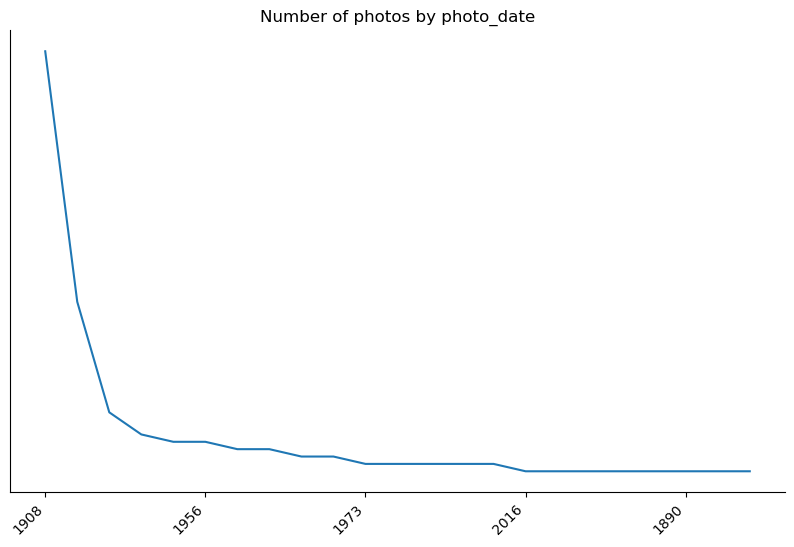

In [100]:
try:
    photos_collection.plot_values(x_widget.value, y_widget.value, bar_number_widget.value, donut_legend_widget.value)
except KeyError:
    print('Select the data to display in the cell above.')

<div class="alert alert-block alert-info">
    <b>Note:</b> To save the chart image directly to your device, simply right-click on the chart and choose the "Save image as..." option from the menu.</div>

# Helpful Resources and Links <a id='useful'></a>
***

* Jupyter Notebook Documentation: <a href="https://docs.jupyter.org/en/latest/" target="blank"> https://docs.jupyter.org/en/latest/</a>
* Python Documentation: <a href="https://docs.python.org/3/" target="blank">https://docs.python.org/3/</a>
* Pandas Documentation: <a href="https://pandas.pydata.org/docs/" target="blank">https://pandas.pydata.org/docs/</a>



# Contacts<a id='contact'></a>
***
* For assistance or questions please contact [alessandra.failla@hotmail.it](mailto:alessandra.failla@hotmail.it)
* All resources related to this notebook are accessible on the associated GitHub Repository: </br><a href="https://github.com/AlessandraFa/photo-archive-data-analysis-framework.git" target="blank">https://github.com/AlessandraFa/photo-archive-data-analysis-framework.git</a>